# **K-Means Clustering for Link Emission Sources**

In this notebook, a K-Means model is created to cluster emission sources. This model provides insights into emission patterns based on clustering of emission sources (different vehicles) and also road intersections length, which can provide valuable information for urban and road planning.

Model Assessment Metrics: kmeans inertia

## **Table of Content**
1. Import Libraries and Load the Dataset
   - Unlike other models where all libraries are imported at once, the required packages are imported in each section
2. Select the appropriate data for modelling
   - Examine if all data are needed
   - Select the appropriate data
   - Explore data
3. Feature selection for modelling
    - Select the meaningful features for K-Means
4. Data Scalling 
    - Scale dataset into same scale
5. Apply PCA for dimensional reduction
    - Apply PCA and examine results
6. Tuning, building model, and visulisation
    - Tuning, building model
    - Apply different visulisations
7. Interpret result
    - Interpret result
    - Further improvement

<div style="border-top: 7px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

**1. Import Libraries and Load the Dataset**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('..\\groupbmlproject\\major_road_csv\\cleaned-LAEI2013_MajorRoads_EmissionsbyLink_2013.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)

<div style="border-top: 7px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

**2. Select the appropriate data for modelling**
   - Examine if all data are needed
   - Select the appropriate data

Examine

In [4]:
df.columns

Index(['GridId', 'Toid', 'GRID_ExactCut_ID', 'Location_ExactCut',
       'BoroughName_ExactCut', 'Lts', 'Length (m)', 'Emissions', 'Pollutant',
       'Motorcycle', 'Taxi', 'Lgv', 'Rigid2Axle', 'Rigid3Axle', 'Rigid4Axle',
       'Artic3Axle', 'Artic5Axle', 'Artic6Axle', 'PetrolCar', 'DieselCar',
       'PetrolLgv', 'DieselLgv', 'LtBus', 'Coach'],
      dtype='object')

In [5]:
# Examine context of emissions
count_ones = (df['Emissions'] == 1).sum()
count_zeros = (df['Emissions'] == 0).sum()

print(count_ones)
print(count_zeros)

36622
329598


Selection of the data
- Variable emission represents the calculation method of pollution, choose one of them is suitable and more efficient for modelling.

In [6]:
filtered_df = df[df['Emissions'] == 0]

Explore

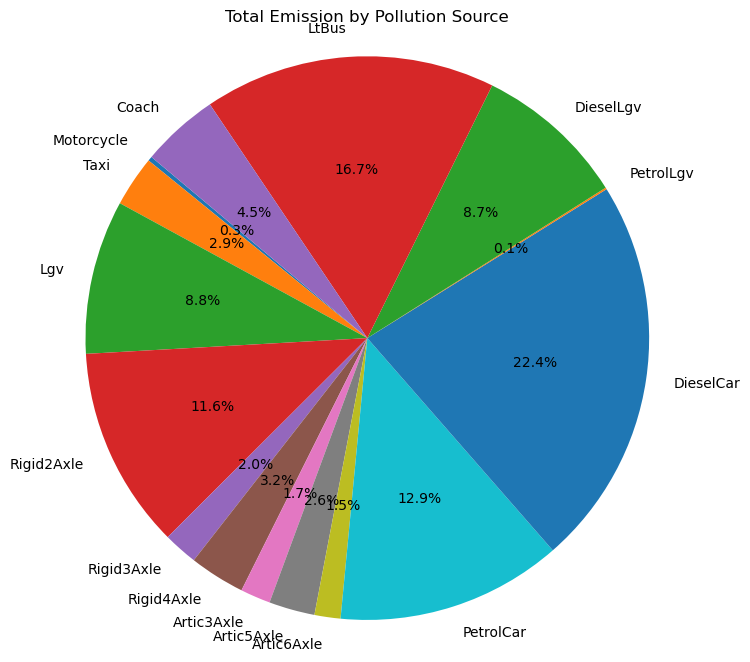

In [18]:
import matplotlib.pyplot as plt

# List of pollution sources
pollution_sources = ['Motorcycle', 'Taxi', 'Lgv', 'Rigid2Axle', 'Rigid3Axle', 'Rigid4Axle',
                    'Artic3Axle', 'Artic5Axle', 'Artic6Axle', 'PetrolCar', 'DieselCar',
                    'PetrolLgv', 'DieselLgv', 'LtBus', 'Coach']
# Calculate the sum of emissions for each source
total_emissions = [filtered_df[source].sum() for source in pollution_sources]

# Create a pie chart to visualize the total emissions
plt.figure(figsize=(8, 8))
plt.pie(total_emissions, labels=pollution_sources, autopct='%1.1f%%', startangle=140)
plt.title('Total Emission by Pollution Source')
plt.axis('equal')
plt.show()

<div style="border-top: 7px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

**3. Feature selection for modelling**
- Select the meaningful features for K-Means

In [11]:
model_df = filtered_df.iloc[:, [6]].join(filtered_df.iloc[:, [2]]).join(filtered_df.iloc[:, 8:])

In [12]:
model_df.columns

Index(['Length (m)', 'GRID_ExactCut_ID', 'Pollutant', 'Motorcycle', 'Taxi',
       'Lgv', 'Rigid2Axle', 'Rigid3Axle', 'Rigid4Axle', 'Artic3Axle',
       'Artic5Axle', 'Artic6Axle', 'PetrolCar', 'DieselCar', 'PetrolLgv',
       'DieselLgv', 'LtBus', 'Coach'],
      dtype='object')

<div style="border-top: 7px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

**4. Data Scalling**
- Scale dataset into same scale

In [13]:
# Import scalter
from sklearn.preprocessing import StandardScaler

# Scalling data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(model_df)

c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and wil

<div style="border-top: 7px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

**5. Apply PCA for dimensional reduction**
- Apply PCA and examine results

In [14]:
# Import PCA
from sklearn.decomposition import PCA

# Apply PCA require the maxmum variance coverage
pca = PCA(.90)
components = pca.fit_transform(X_normalized)

In [15]:
# Examine results
rounded_components = pca.components_.round(decimals=2)
print("Number of retained components:", pca.n_components_)
print("The selected PCA components:", rounded_components)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Number of retained components: 6
The selected PCA components: [[ 0.07 -0.   -0.09  0.27  0.15  0.28  0.28  0.28  0.28  0.28  0.28  0.28
   0.28  0.28  0.28  0.28  0.13  0.08]
 [-0.26  0.03  0.19 -0.22 -0.22 -0.19  0.26  0.26  0.26  0.29  0.27  0.29
  -0.22 -0.17 -0.23 -0.19 -0.15 -0.38]
 [-0.53  0.54 -0.18 -0.1   0.39 -0.06  0.01  0.04  0.04  0.03  0.03  0.03
  -0.1  -0.06 -0.08 -0.06  0.04  0.44]
 [ 0.29 -0.12  0.64 -0.03  0.3  -0.05  0.04  0.06  0.06  0.04  0.05  0.05
  -0.05 -0.05 -0.05 -0.05 -0.41  0.45]
 [-0.36 -0.82 -0.29 -0.08  0.11 -0.05  0.02  0.04  0.04  0.03  0.03  0.03
  -0.06 -0.04 -0.06 -0.05 -0.01  0.29]
 [ 0.65  0.06 -0.44 -0.17  0.07 -0.2   0.11  0.1   0.1   0.09  0.1   0.09
  -0.16 -0.19 -0.21 -0.2   0.25  0.22]]
Explained variance ratio: [0.62057501 0.07449409 0.06108515 0.05617569 0.05362528 0.04385225]


In [16]:
components_df = pd.DataFrame(components)
combined_df = pd.concat([model_df, components_df], axis=1)
correlation = combined_df.corr()

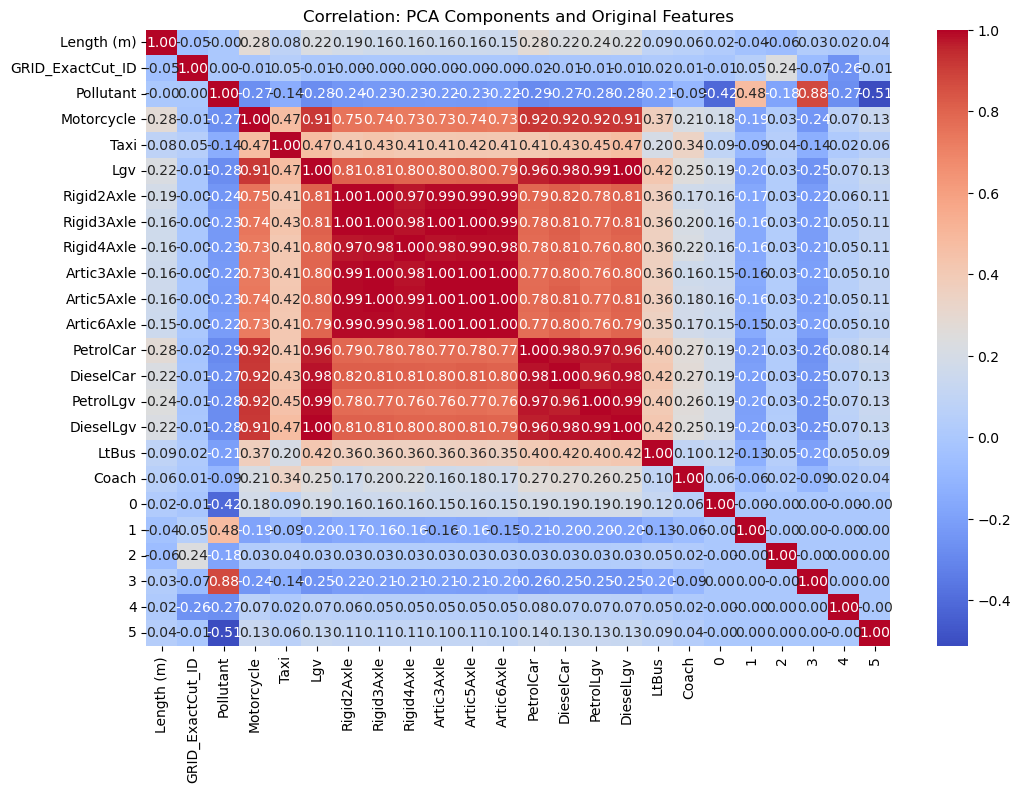

In [19]:
import seaborn as sns
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

# Set plot labels and title
plt.title("Correlation: PCA Components and Original Features")

# Show the heatmap
plt.show()

In [20]:
loading_matrix = pca.components_
loading_matrix

array([[ 0.07005461, -0.00186973, -0.08930452,  0.26656211,  0.15029837,
         0.28364185,  0.28247038,  0.28232139,  0.2795187 ,  0.2801629 ,
         0.28173756,  0.2795209 ,  0.27839523,  0.28365173,  0.27772291,
         0.28366138,  0.13220787,  0.07972553],
       [-0.25627574,  0.02638181,  0.1884888 , -0.22386838, -0.22201329,
        -0.18662274,  0.25751065,  0.25899122,  0.25503143,  0.285248  ,
         0.27377784,  0.28709875, -0.21512733, -0.1707735 , -0.226815  ,
        -0.18614348, -0.14568626, -0.37937554],
       [-0.53164439,  0.54265865, -0.17812123, -0.0976794 ,  0.38626084,
        -0.05627455,  0.0107711 ,  0.04128685,  0.04235972,  0.02521247,
         0.02906978,  0.03253876, -0.1027091 , -0.06417831, -0.07969654,
        -0.05599885,  0.03617946,  0.44454954],
       [ 0.28917818, -0.12051217,  0.6391448 , -0.03404081,  0.30067405,
        -0.04673112,  0.03806105,  0.06131463,  0.06205296,  0.04349035,
         0.04560545,  0.05273197, -0.04757933, -0.047

<div style="border-top: 7px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

**6. Tuning, building model, and visulisation**
- Tuning, building model
- Apply different visulisations

Tuning, building model

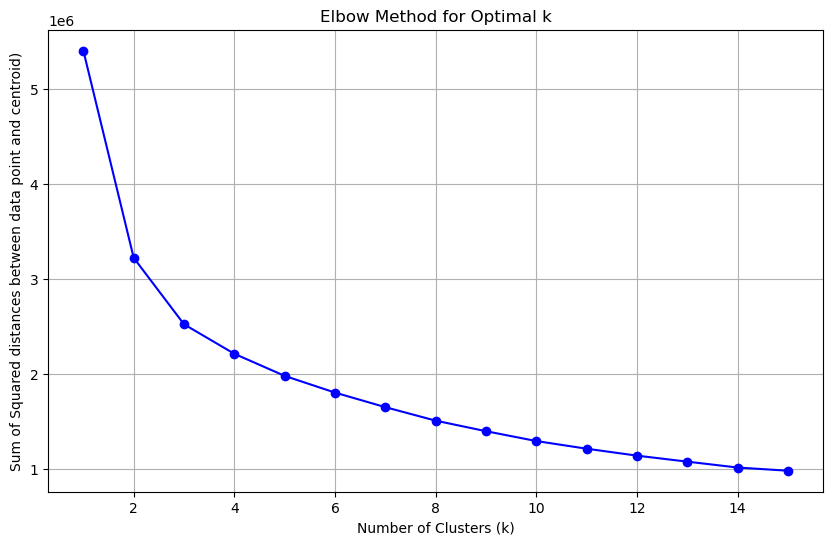

In [21]:
# Import model and packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of k values to try
k_rng = range(1, 16)
wcss = []

# Iterate over each value of k
for i in k_rng:
    # Create a K-Means model with the current value of k
    km = KMeans(n_clusters=i, init="k-means++",  max_iter = 300, n_init=10, random_state=42)  
    km.fit(components)
    
    # Append the SSE (inertia) to the list
    wcss.append(km.inertia_)

# Plot the SSE values against k
plt.figure(figsize=(10, 6))
plt.plot(k_rng, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared distances between data point and centroid)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [22]:
# Suppress the specific warning
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in sqrt")

# Fit K-Means clustering with the chosen number of clusters (k=4)
k = 4
kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
kmeans.fit(components)
lables = kmeans.labels_
centers = kmeans.cluster_centers_

Apply different visulisations

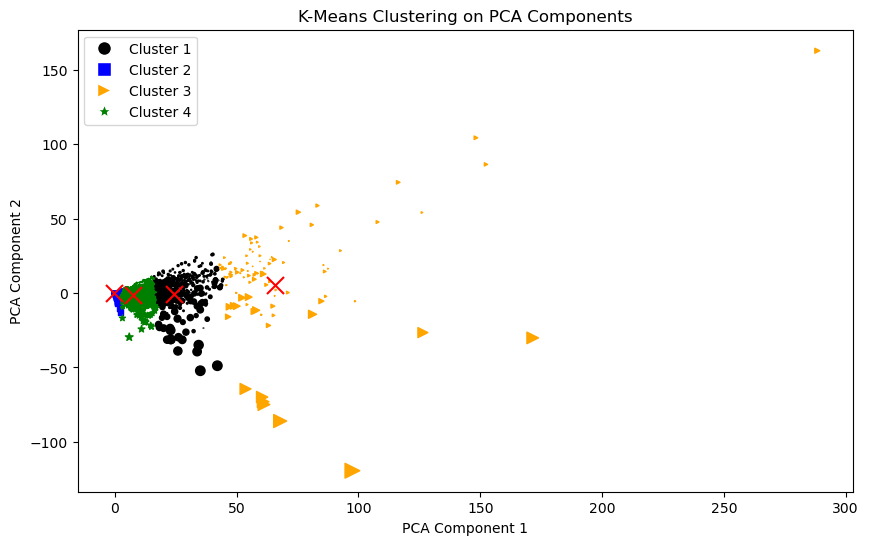

In [23]:
# Visualize the clusters using PCA-transformed components (2D)
plt.figure(figsize=(10, 6))

markers = ["o", "s", ">", "*"]
colors = ["black", "blue", "orange", "green"]
for cluster_label in range(k):
    cluster_points = components[lables==cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], marker=markers[cluster_label], 
                color=colors[cluster_label])

plt.scatter(centers[:, 0], centers[:, 1], marker="x", s = 150, c="red")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering on PCA Components')

# Create legend
legend_elements = [plt.Line2D([0], [0], marker=markers[i], color='w', markerfacecolor=colors[i], markersize=10)
                   for i in range(k)]
plt.legend(legend_elements, ['Cluster {}'.format(i + 1) for i in range(k)])
plt.show()

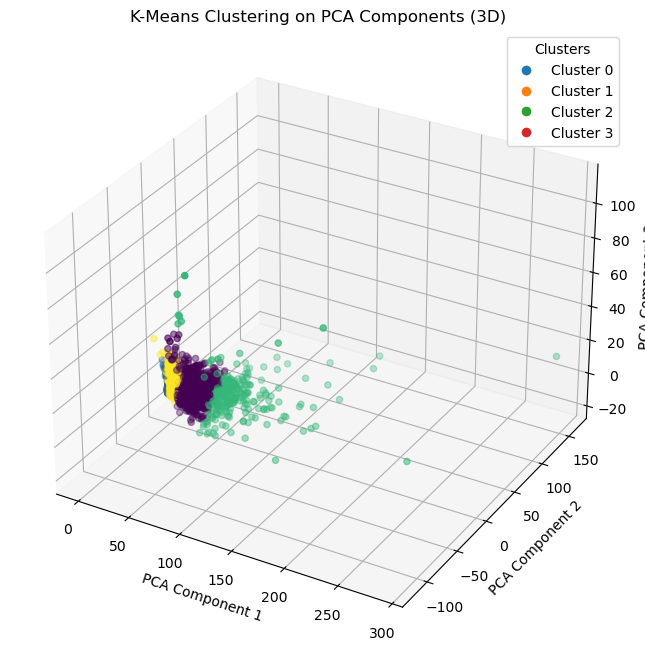

In [24]:
# Important numpy, for 3D plot
import numpy as np

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualize the clusters using three PCA-transformed components
x = components[:, 0]
y = components[:, 1]
z = components[:, 2]

ax.scatter(x, y, z, c=lables, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Title
plt.title('K-Means Clustering on PCA Components (3D)')

# Show the cluster labels in a legend
unique_labels = np.unique(lables)
scatter_legend = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {label}', 
                             markersize=8, markerfacecolor=f'C{label}') for label in unique_labels]
plt.legend(handles=scatter_legend, title='Clusters', loc='upper right')

plt.show()

<div style="border-top: 7px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

**7. Interpret result**
- Interpret result
- Further improvement

Interpret

In [25]:
# Examine cluster centers
# Transform back to originial scale: 
cluster_centers_original1 = pca.inverse_transform(centers)
cluster_centers_original_final = scaler.inverse_transform(cluster_centers_original1)

In [26]:
feature_names = model_df.columns

In [27]:
# Create a DataFrame to store cluster center values with feature names
cluster_centers_df = pd.DataFrame(cluster_centers_original_final, columns=feature_names)

# Analyze the cluster centers
for cluster_id, center_values in enumerate(cluster_centers_df.iterrows()):
    print(f"Cluster {cluster_id} Center:")
    print(center_values)

Cluster 0 Center:
(0, Length (m)           191.617801
GRID_ExactCut_ID    1785.993080
Pollutant              0.477412
Motorcycle             0.001548
Taxi                   0.020442
Lgv                    0.065041
Rigid2Axle             0.090903
Rigid3Axle             0.017083
Rigid4Axle             0.027602
Artic3Axle             0.015088
Artic5Axle             0.022770
Artic6Axle             0.013327
PetrolCar              0.080894
DieselCar              0.169984
PetrolLgv              0.000698
DieselLgv              0.064343
LtBus                  0.077283
Coach                  0.022960
Name: 0, dtype: float64)
Cluster 1 Center:
(1, Length (m)            61.447556
GRID_ExactCut_ID    1819.690786
Pollutant              5.179602
Motorcycle             0.000024
Taxi                   0.000182
Lgv                    0.000587
Rigid2Axle             0.000734
Rigid3Axle             0.000095
Rigid4Axle             0.000154
Artic3Axle             0.000083
Artic5Axle             0.000129
Art

In [28]:
# Examine statistics for each clsuter
# Add cluster labels to the DataFrame
model_df['Cluster'] = lables
# Group data by cluster
cluster_groups = model_df.groupby('Cluster')
cluster_means = cluster_groups.mean()
cluster_medians = cluster_groups.median()
cluster_stddevs = cluster_groups.std()

In [29]:
cluster_means

,Length (m),GRID_ExactCut_ID,Pollutant,Motorcycle,Taxi,Lgv,Rigid2Axle,Rigid3Axle,Rigid4Axle,Artic3Axle,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach
Cluster,,,,,,,,,,,,,,,,,,
0,188.796179,1758.344072,1.000447,0.001536,0.019903,0.065368,0.090255,0.017092,0.027619,0.015122,0.022853,0.013356,0.079923,0.171236,0.000692,0.064676,0.085638,0.024329
1,61.518336,1820.687962,5.165659,0.000024,0.000181,0.000584,0.000730,0.000096,0.000154,0.000083,0.000127,0.000068,0.001148,0.001386,0.000007,0.000576,0.001327,0.000312
2,346.742634,1713.032847,1.000000,0.003627,0.055911,0.154363,0.265031,0.050651,0.082731,0.044762,0.067318,0.040016,0.192259,0.409814,0.001648,0.152715,0.120275,0.084273
3,105.048689,1843.621238,1.038699,0.000504,0.007546,0.021174,0.026273,0.004803,0.007788,0.004204,0.006435,0.003637,0.026590,0.055072,0.000226,0.020948,0.046011,0.011793


In [30]:
cluster_medians

,Length (m),GRID_ExactCut_ID,Pollutant,Motorcycle,Taxi,Lgv,Rigid2Axle,Rigid3Axle,Rigid4Axle,Artic3Axle,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach
Cluster,,,,,,,,,,,,,,,,,,
0,147.404079,1732.0,1.0,0.001345,0.013514,0.059590,0.084399,0.016015,0.025682,0.014099,0.021393,0.012504,0.072360,0.157620,6.176676e-04,0.058922,0.036834,0.0
1,36.359032,1818.0,5.0,0.000004,0.000017,0.000112,0.000084,0.000008,0.000014,0.000008,0.000013,0.000006,0.000195,0.000252,9.334981e-07,0.000110,0.000023,0.0
2,292.295726,1630.0,1.0,0.003169,0.033833,0.142182,0.237307,0.044860,0.072331,0.040252,0.059899,0.036236,0.174829,0.377524,1.502129e-03,0.140624,0.033705,0.0
3,77.102339,1825.5,1.0,0.000426,0.004103,0.018488,0.022597,0.004117,0.006676,0.003594,0.005514,0.003127,0.023250,0.048217,1.976386e-04,0.018301,0.017199,0.0


In [31]:
cluster_stddevs

,Length (m),GRID_ExactCut_ID,Pollutant,Motorcycle,Taxi,Lgv,Rigid2Axle,Rigid3Axle,Rigid4Axle,Artic3Axle,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach
Cluster,,,,,,,,,,,,,,,,,,
0,133.889617,967.535463,0.021152,0.000845,0.033983,0.028496,0.039752,0.007722,0.013208,0.007073,0.010408,0.006363,0.036578,0.073417,0.000344,0.028171,0.137318,0.083846
1,79.685625,942.419264,2.501506,0.000053,0.000951,0.001410,0.002104,0.000315,0.000515,0.000274,0.000414,0.000234,0.002646,0.003572,0.000018,0.001394,0.008707,0.003562
2,204.261735,939.670386,0.000000,0.001988,0.114934,0.070491,0.161758,0.030266,0.050225,0.027574,0.040346,0.024468,0.087279,0.179453,0.000822,0.069717,0.206145,0.299835
3,101.110103,934.941432,0.274833,0.000336,0.013937,0.010979,0.016341,0.003149,0.005065,0.002857,0.004206,0.002552,0.014600,0.029390,0.000124,0.010862,0.080182,0.040521


Given the pollutants are lable encoded: 
- CO2: 0
- NOx: 1            
- PM10_Brake: 2     
- PM10_Exhaust: 3    
- PM10_Resusp: 4     
- PM10_Tyre: 5      
- PM25_Brake: 6     
- PM25_Exhaust: 7    
- PM25_Resusp: 8     
- PM25_Tyre: 9 

Cluster 3 Center:
(3, Length (m)    350.299409
Pollutant       1.948189
Motorcycle      0.003606
Taxi            0.060006
Lgv             0.155286
Rigid2Axle      0.266427
Rigid3Axle      0.050651
Rigid4Axle      0.081896
Artic3Axle      0.044842
Artic5Axle      0.067453
Artic6Axle      0.039797
PetrolCar       0.189504
DieselCar       0.408239
PetrolLgv       0.001631
DieselLgv       0.153655
LtBus           0.137661
Coach           0.078444
Name: 3, dtype: float64)



Cluster0, represents the pollutants with upper lable values (maybe pm2.5 Tyre, Resusp), for these pollutants, the length of the road intersection has lower influence. The major emission sources are LtBus, DieselCar, and PetrolCar. This suggests that pm2.5 emission will more likely occur in concentrated areas (shorter road intersections) with lots traffic volumes.

Cluster1: represents the pollutants with lower values (e.g. CO2, NOx), for these pollutants the length of the road intersection has a strong influence. The main emission sources are DieselCar, Rigid2Axle, PetrolCar, LtBus, and DieselLgv. This indicates that these pollutants are likely to occur where the road intersection is quite long and have high traffic volumes.

Cluster2: represents the pollutants with lower medium values (perhaps pm10), for these pollutants the length of the road intersection has a strong (tend to be moderate) influence. The main emission sources are DieselCar, LtBus, Rigid2Axle, and PetrolCar. This shows that these pollutants are likely to occur where traffic volumes are high.

Cluster3: represents the pollutants with upper medium values (about pm2.5 exhaust and brake, pm10 tyres), for these pollutants the length of the road intersection has a significant influence. The main emission sources are DieselCar, Rigid2Axle, PetrolCar and DieselLgv. This indicates that these pollutants are likely to occur where road intersections are quitet long and have high traffic volumes with industry vehicle type.

Further improvement: 

- Consider further breakdown and clustering for selected pollutants.
- Combine emission associations for deeper analysis